## Create orders
last modified: 1/12/2018

### Import and instantiate

In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from time import sleep

# Temporary fix until matplotlib version and pandas updates
from pandas.plotting import register_matplotlib_converters
junk = register_matplotlib_converters()

In [3]:
import sys, os
sys.path.append(os.path.join(os.path.dirname('.'), '..', 'lib'))

from tdameritrade import tdameritrade_api
from interactivebrokers import ib_api as IB_API
from strategies import orders

In [25]:
ib_api = IB_API.main(host="192.168.1.2", port=7497)

serverVersion:142 connectionTime:b'20190827 07:31:02 EST'


ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usopt
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds


-1
-1
-1
-1
-1
-1


In [5]:
td_api = tdameritrade_api.TDAmeritradeAPI.create_api_from_account_file(filename="../private_data/information.json")

In [6]:
ACCOUNT_IRA = 'U2728633'
ACCOUNT_IND = 'U2437884'

In [7]:
with pd.HDFStore("/home/brent/.jupyter/data/data.hdf", mode="r") as hdf_store:
    bars = hdf_store["bars"]
    fundamentals = hdf_store["fundamentals"]
    quotes = hdf_store["quotes"]
    positions = hdf_store["positions"]
    universe = bars.columns.get_level_values(0).unique()

### Manually selected trades

#### Maket index (SPY) trade
Calculates the average lows/highs and sets limit orders to buy/sell at near extremums. 

In [8]:
symbols = "SPY, QQQ, DIA".split((", "))
end_date = datetime.today()
start_date = end_date - timedelta(days=20)
data = ib_api.get_price_history(symbols, start_date=start_date, end_date=end_date, bar_size="1 day", rth=False)

In [9]:
high = data.loc[:, (slice(None), "high")].droplevel(1, axis=1)
low = data.loc[:, (slice(None), "low")].droplevel(1, axis=1)
close_price = data.iloc[-1].loc[(slice(None), "close_price")]

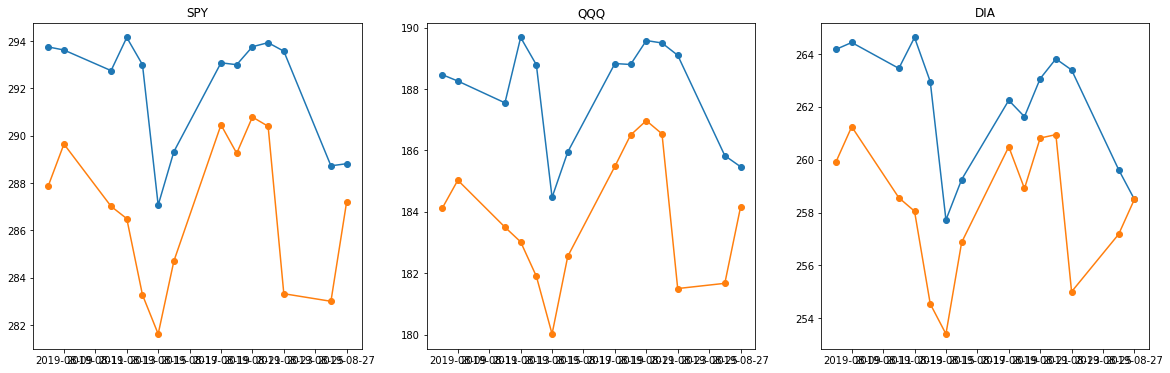

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
for i, symbol in enumerate(["SPY", "QQQ", "DIA"]):
    ax[i].plot(data.loc[:, (symbol, "high")], marker="o")
    ax[i].plot(data.loc[:, (symbol, "low")], marker="o")
    ax[i].set_title(symbol)

In [32]:
orders = []

amount = 10000
quantity = int(amount / close_price["SPY"])
quantities = [quantity * n for n in [1, 1.5, 2]]

# Limit BUYS
prices = [round(low["SPY"].mean() - x * low["SPY"].std(), 2) for x in (0, .6, 1.2, 1.8)]
profits = [round(high["SPY"].mean() - x * high["SPY"].std(), 2) for x in (0, .5, 1.0, 1.5)]
stops = [round(low["SPY"].mean() - x * high["SPY"].std(), 2) for x in (2, 2.4, 2.8, 3.2)]
for price, profit, stop, q in zip(prices, profits, stops, quantities):
    orders.append(
{
    "symbol": "SPY",
    "instruction": "BUY",
    "price": price,
    "quantity": q,
    "outside_rth": True,
    "tif": "GTC",
    "profit_price": profit,
    "stop_price": stop
})
    
# Limit SELLS
prices = [round(high["SPY"].mean() + x * high["SPY"].std(), 2) for x in (0, .6, 1.2, 1.8)]
profits = [round(low["SPY"].mean() + x * low["SPY"].std(), 2) for x in (0, .7, 1.4, 2.1)]
stops = [round(low["SPY"].mean() + x * high["SPY"].std(), 2) for x in (2, 2.4, 2.8, 3.2)]
for price, profit, stop, q in zip(prices, profits, stops, quantities):
    orders.append(
{
    "symbol": "SPY",
    "instruction": "SELL",
    "price": price,
    "quantity": q,
    "outside_rth": True,
    "tif": "GTC",
    "profit_price": profit,
    "stop_price": stop
})

In [35]:
ib_api.create_bracket_orders(orders)
ib_api.place_all_orders()

#### Accumulate

In [20]:
symbols = "LHX, GOOGL, COST, DG, FIVE, JNJ".split(", ")
end_time=datetime.today()
start_time = end_time - timedelta(days=0, hours=5)
temp = ib_api.get_price_history(symbols, start_date=start_time, end_date=end_time, bar_size="10 mins", rth=False)

In [ ]:
ib_api.get_histogram("MMM")

In [10]:
temp = ib_api.get_price_history(["LHX"], start_date=datetime.today()-timedelta(days=2), end_date=datetime.today(), bar_size="1 day", rth=True)

> /home/brent/.jupyter/lib/interactivebrokers/ib_api.py(606)get_price_history()
-> for symbol in symbols:
(Pdb) c


In [10]:
long_bracket = "LHX, GOOGL, MSFT, CVS, JNJ".split(", ")
short_bracket = "".split(", ")
short_stop_limit = "".split(", ")

ERROR -1 2104 Market data farm connection is OK:usopt


-1


ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.usopt
ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.usopt


-1
-1


In [ ]:
with symbol in long_bracket:
    ib_api.create_stop_li

#### Accumulate

In [7]:
symbols = "LHX, GOOGLE, MSFT, JNJ".split(", ")
symbols = ["MSFT", "GOOGL"]
end_time=datetime.today()
start_time = end_time - timedelta(days=0, hours=1)
temp = ib_api.get_price_history(symbols, start_date=start_time, end_date=end_time, bar_size="10 mins", rth=True)

In [10]:
temp = ib_api.get_price_history(["LHX"], start_date=datetime.today()-timedelta(days=2), end_date=datetime.today(), bar_size="1 day", rth=True)

> /home/brent/.jupyter/lib/interactivebrokers/ib_api.py(606)get_price_history()
-> for symbol in symbols:
(Pdb) c


In [10]:
long_bracket = "LHX, GOOGL, MSFT, CVS, JNJ".split(", ")
short_bracket = "".split(", ")
short_stop_limit = "".split(", ")

ERROR -1 2104 Market data farm connection is OK:usopt


-1


ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.usopt
ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.usopt


-1
-1


In [ ]:
with symbol in long_bracket:
    ib_api.create_stop_li

**Before (morning) earnings stop limit orders**

In [16]:
with pd.HDFStore("trades.hdf", mode="r") as hdf_store:
    stop_orders = hdf_store["before_earnings_stop_limit_orders"]
stop_orders

OSError: ``trades.hdf`` does not exist

In [18]:
orders = [order[1].to_dict() for order in stop_orders.iterrows()]
ib_api.create_stop_limit_orders(orders)

In [19]:
ib_api.place_all_orders()

**After (after market close) earnings stop limit orders**

In [41]:
with pd.HDFStore("trades.hdf", mode="r") as hdf_store:
    orders = hdf_store["after_earnings_stop_limit_orders"]
orders

,instruction,limit_price,outside_rth,profit_price,quantity,stop_price,symbol,tif
0,SELL,1598.85,True,1663.45,0,1615.00,AMZN,DAY
1,SELL,86.70,True,90.21,11,87.58,PKI,DAY


In [36]:
orders = [order[1].to_dict() for order in orders.iterrows()]
ib_api.create_stop_limit_orders(orders)
ib_api.place_all_orders()

**Dividend bracket orders**

In [19]:
dividend_buys = list(set(dividends.index) - set(positions.loc[positions.account=="U2728633"]))
dividend_buys = dividends.loc[dividend_buys].sort_values('dividendDate')
dividend_buys.head(5)

NameError: name 'dividends' is not defined

In [70]:
fundamentals.loc[dividend_buys.index, ["dividendYield", "currentRatio", "quickRatio", "peRatio", "pegRatio", "pbRatio", "pcfRatio", "prRatio", "totalDebtToCapital", "totalDebtToEquity"]]

,dividendYield,currentRatio,quickRatio,peRatio,pegRatio,pbRatio,pcfRatio,prRatio,totalDebtToCapital,totalDebtToEquity
PGR,3.85,0.00000,0.00000,14.75519,0.201291,3.51910,15.00132,1.19167,28,40
NSC,2.07,0.71864,0.63875,17.34457,0.517210,2.88168,11.92836,3.92476,42,72
SYF,2.82,0.00000,0.00000,7.95873,0.186162,1.45885,9.60566,1.30690,0,163
MET,3.73,0.00000,0.00000,9.44354,0.054517,0.86901,0.00000,0.65722,24,32
AAL,1.19,0.58099,0.48459,7.57372,1.178699,0.00000,3.72168,0.36447,102,0
AWK,1.92,0.45767,0.43364,29.00241,3.213471,2.87444,15.38306,4.93827,58,143
FE,3.87,0.44759,0.40621,0.00000,0.000000,2.91621,0.00000,1.65421,73,282
AEP,3.45,0.55688,0.45626,19.59284,8.247360,1.98820,9.29618,2.33698,56,131
JBHT,1.01,1.11139,0.00000,24.21829,0.000000,5.39886,12.49470,1.32255,35,54
HP,5.40,2.95770,2.53843,0.00000,0.000000,1.32850,10.68424,2.34973,10,11


In [18]:
limit_percent = np.linspace(-0.2, -3.0, dividends.shape[0])
for i, symbol in enumerate(dividends.drop(["AON", "PNW", "LW", "AWK", "FE", "WEC"], axis=0).sort_values("dividendDate").index):
    if symbol not in positions.loc[ACCOUNT_IRA, "symbol"].values:
        ib_api.quick_bracket(symbol=symbol, instruction="BUY", amount=1000, limit_percent=limit_percent[i], profit_percent=3)

NameError: name 'dividends' is not defined

Sell bracket orders for positions.

In [72]:
position_sells = list(set(positions.loc[positions.account=="U2728633"]) - set(dividends.index))
position_sells

['cost', 'position', 'account', 'secType']

In [76]:
positions.loc[positions.account=="U2728633"]

,cost,position,secType,account
symbol,,,,
FL,56.968824,17.0,STK,U2728633
ABT,69.681429,14.0,STK,U2728633
LOW,94.790000,10.0,STK,U2728633
PNC,0.000000,0.0,STK,U2728633
CL,62.162500,16.0,STK,U2728633
APA,31.722258,31.0,STK,U2728633
CVS,64.016667,15.0,STK,U2728633
PFE,42.035349,43.0,STK,U2728633
F,8.785000,100.0,STK,U2728633


In [77]:
dividends

,beta,bookValuePerShare,currentRatio,divGrowthRate3Year,dividendAmount,dividendDate,dividendPayAmount,dividendPayDate,dividendYield,epsChange,...,revChangeYear,sharesOutstanding,shortIntDayToCover,shortIntToFloat,symbol,totalDebtToCapital,totalDebtToEquity,vol10DayAvg,vol1DayAvg,vol3MonthAvg
PGR,0.71239,12.30146,0.00000,0.0,2.51,2019-02-01 00:00:00.0,1.1247,2018-02-09 00:00:00.0,3.85,0.0,...,0,583,0,0,PGR,28,40,3185093,3,73
NSC,1.37133,9.41002,0.71864,0.0,3.44,2019-02-01 00:00:00.0,0.7200,2018-06-11 00:00:00.0,2.07,0.0,...,0,272,0,0,NSC,42,72,2251574,2,44
SYF,1.21766,23.25555,0.00000,0.0,0.84,2019-02-01 00:00:00.0,0.1500,2018-05-17 00:00:00.0,2.82,0.0,...,0,718,0,0,SYF,0,163,12075533,12,155
MET,1.19604,0.00000,0.00000,0.0,1.68,2019-02-04 00:00:00.0,0.4200,2018-06-13 00:00:00.0,3.73,0.0,...,0,986,0,0,MET,24,32,4970637,4,144
AAL,1.58535,0.00000,0.58099,0.0,0.40,2019-02-05 00:00:00.0,0.1000,2018-05-22 00:00:00.0,1.19,0.0,...,0,460,0,0,AAL,102,0,10167985,10,185
FE,0.23644,0.00000,0.44759,0.0,1.52,2019-02-06 00:00:00.0,0.3600,2018-06-01 00:00:00.0,3.87,0.0,...,0,511,0,0,FE,73,282,4124255,4,97
AWK,0.21511,3.74117,0.45767,0.0,1.82,2019-02-06 00:00:00.0,0.4550,2018-06-01 00:00:00.0,1.92,0.0,...,0,180,0,0,AWK,58,143,908186,0,20
BA,1.23822,0.00000,1.10412,0.0,8.22,2019-02-07 00:00:00.0,1.7100,2018-06-01 00:00:00.0,2.29,0.0,...,0,567,0,0,BA,111,0,3308731,3,86
HP,1.51786,0.00000,2.95770,0.0,2.84,2019-02-07 00:00:00.0,0.7000,2018-06-01 00:00:00.0,5.40,0.0,...,0,109,0,0,HP,10,11,1411886,1,32
AEP,0.11956,3.46157,0.55688,0.0,2.68,2019-02-07 00:00:00.0,0.6200,2018-06-08 00:00:00.0,3.45,0.0,...,0,493,0,0,AEP,56,131,2357536,2,53


In [75]:
positions

,cost,position,secType,account
symbol,,,,
AAPL,151.922394,16.0,STK,U2437884
MMM,194.640000,20.0,STK,U2437884
FL,56.968824,17.0,STK,U2728633
GOOGL,1079.000000,1.0,STK,U2437884
ABT,69.681429,14.0,STK,U2728633
LOW,94.790000,10.0,STK,U2728633
PNC,0.000000,0.0,STK,U2728633
NVDA,136.030000,20.0,STK,U2437884
CL,62.162500,16.0,STK,U2728633


In [73]:
for pos in positions.iterrows():
    if pos[0] not in dividends:
        print(pos[0])

AAPL
MMM
FL
GOOGL
ABT
LOW
PNC
CL
AGG
APA
HAS
CVS
PFE
DWDP
T
CAG
XOM
CLX
F
C
JNJ
M
IP


### Bracket order buys for soon dividends that are not positions

In [50]:
ib_api.get_quotes("TXN")

TXN    95.33
dtype: float64

In [11]:
symbols = list(set(dividends.index) - set(positions.loc[ACCOUNT_IRA]['symbol']))
quotes = td_api.get_quotes(symbols)
quotes = quotes['regularMarketLastPrice']

INFO:tdameritrade.tdameritrade_api:URL: https://api.tdameritrade.com/v1/marketdata/quotes?symbol=PNR%2CAON%2CCL%2CCLX%2CLW%2CPG%2CAPA%2CPFE%2CFL%2CPNW


In [18]:
bracket_orders = []
for symbol in symbols:
    bracket_orders.append(orders.easy_bracket(symbol=symbol, instruction="BUY", amount=1000, limit_percent=-0.2, profit_percent=1.0, quotes=quotes))
ib_api.create_bracket_orders(req_orders=bracket_orders)

In [19]:
ib_api.place_all_orders()

In [14]:
positions

,cost,position,secType,symbol
account,,,,
U2437884,151.922394,16.0,STK,AAPL
U2437884,194.640000,20.0,STK,MMM
U2728633,163.366667,6.0,STK,GD
U2437884,159.867800,-10.0,STK,QQQ
U2728633,94.790000,10.0,STK,LOW
U2437884,140.454307,-15.0,STK,IWM
U2728633,119.635000,8.0,STK,PNC
U2437884,140.820000,10.0,STK,NVDA
U2728633,110.000000,10.0,STK,AGG


ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.hfarm
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.hfarm
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.usfarm.nj
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.usfarm.nj
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.jfarm
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.jfarm
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.eufarm
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.eufarm
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.cashfarm
ERROR:root:ERROR -1 2108

### Filter by fundamentals

In [12]:
fundamentals = td_api.get_fundamental(this_week_dividends + next_week_dividends)

INFO:tdameritrade.tdameritrade_api:URL: https://api.tdameritrade.com/v1/instruments?symbol=ABT%2CAPA%2CCAT%2CCOO%2CDGX%2CEOG%2CFCX%2CFL%2CGD%2CMAA%2CORCL%2CPG%2CPKI%2CPNC%2CABBV%2CZTS%2CCL%2CCLX%2CCVS&projection=fundamental


In [14]:
dividend_buys = fundamentals[fundamentals["dividendYield"]>1].sort_values(by="dividendYield")

In [28]:
dividend_buys.index.values

array(['ANTM', 'ORCL', 'FCX', 'ABT', 'GD', 'FL', 'DGX', 'CLX', 'CAT',
       'CL', 'CVS', 'PG', 'PNC', 'APA', 'MAA', 'ABBV'], dtype=object)

In [20]:
end_date = datetime.today()
start_date = end_date - timedelta(days=300)
bars = td_api.get_price_history(symbols=dividend_buys.index.values, start_date=start_date, end_date=end_date)

INFO:tdameritrade.tdameritrade_api:URL: https://api.tdameritrade.com/v1/marketdata/ANTM/pricehistory?periodType=month&frequencyType=daily&frequency=1&endDate=1547435205000&startDate=1521511605000&needExtendedHoursData=True
INFO:tdameritrade.tdameritrade_api:URL: https://api.tdameritrade.com/v1/marketdata/ORCL/pricehistory?periodType=month&frequencyType=daily&frequency=1&endDate=1547435205000&startDate=1521511605000&needExtendedHoursData=True
INFO:tdameritrade.tdameritrade_api:URL: https://api.tdameritrade.com/v1/marketdata/FCX/pricehistory?periodType=month&frequencyType=daily&frequency=1&endDate=1547435205000&startDate=1521511605000&needExtendedHoursData=True
INFO:tdameritrade.tdameritrade_api:URL: https://api.tdameritrade.com/v1/marketdata/ABT/pricehistory?periodType=month&frequencyType=daily&frequency=1&endDate=1547435205000&startDate=1521511605000&needExtendedHoursData=True
INFO:tdameritrade.tdameritrade_api:URL: https://api.tdameritrade.com/v1/marketdata/GD/pricehistory?periodType=

In [ ]:
orders.easy_bracket(symbol="ORCL", instruction="BUY", )

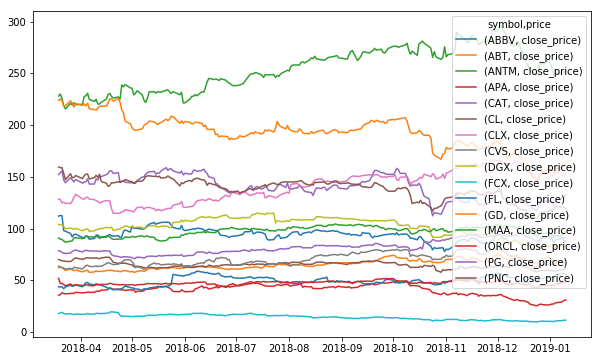

In [27]:
bars.loc[:, (slice(None), 'close_price')].plot(figsize=(10, 6), legend='lower-left')

In [4]:
with pd.HDFStore('bars.hdf', mode='r') as hdf_store:
    bars = hdf_store['index']

In [5]:
hdf_key = 'index'
end_date = datetime.today()
start_date = end_date - timedelta(days=300)
if NEW_START:
    bars = td_api.get_price_history(symbols=tickers, rth=False, start_date=start_date, end_date=end_date)
else:
    new_symbols = list(set(symbols) - set(bars.columns.get_level_values(0).unique()))
    new_bars = app.get_price_history(symbols=new_symbols, rth=False, start_date=start_date, end_date=end_date)
    bars = bars.join(new_bars)
with pd.HDFStore('bars.hdf', mode='w') as hdf_store:
    bars.to_hdf(hdf_store, 'index')

 T


ERROR:root:ERROR 2001 322 Error processing request:-'bI' : cause - Duplicate ticker ID for API historical data query


 SBUX


ERROR:root:ERROR 2001 322 Error processing request:-'bI' : cause - Duplicate ticker ID for API historical data query


 LB


ERROR:root:ERROR 2001 322 Error processing request:-'bI' : cause - Duplicate ticker ID for API historical data query


 GPS
 CL


KeyError: 'CL'

In [10]:
quotes = app.get_quotes(symbols)

ERROR:root:ERROR 2001 162 Historical Market Data Service error message:HMDS query returned no data: DWDP@SMART Trades


KeyboardInterrupt: 

In [64]:
longs = "DWDP, MMM, C, JPM, M"
longs = longs.split(", ")

In [ ]:
shorts =  "NTFLX, WDAY"

**User Defined Orders**

##### Longs

In [23]:
bracket_orders = []
#bracket_orders.append(orders.easy_bracket(symbol="M", instruction="BUY", amount=1000, percent=-1, bars=bars, quotes=quotes))
bracket_orders.append(orders.easy_bracket(symbol="ROKU", instruction="BUY", amount=1000, percent=-.1, bars=bars, quotes=quotes))
bracket_orders.append(orders.easy_bracket(symbol="NFLX", instruction="BUY", amount=1000, percent=-.2, bars=bars, quotes=quotes))

NameError: name 'bars' is not defined

In [63]:
app.create_bracket_orders(bracket_orders)
app.place_all_orders()

**Strategies**

##### Index Volatility Bracket Orders

In [6]:
bracket_orders = []
for symbol in symbols:
    bracket_orders = bracket_orders + strategies.easy_volatility(symbol=symbol, bars=bars, quotes=quotes)

In [8]:
app.create_bracket_orders(bracket_orders)
app.place_all_orders()

**Pegged Orders**

In [4]:
pegged_params = [
    {'symbol': "AMAT", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "NVDA", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "MU", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "AMZN", 'instruction': "BUY", 'amount': 2000, 'ref_symbol': "QQQ"},
    {'symbol': "NFLX", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "GOOG", 'instruction': "BUY", 'amount': 2000, 'ref_symbol': "QQQ"},
    {'symbol': "FB", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "WDAY", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "AMD", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "INTC", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "MSFT", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "AMAT", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "MU", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "AMZN", 'instruction': "SELL", 'amount': 2000, 'ref_symbol': "QQQ"},
    {'symbol': "NFLX", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "GOOG", 'instruction': "SELL", 'amount': 2000, 'ref_symbol': "QQQ"},
    {'symbol': "FB", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "WDAY", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "AMD", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "INTC", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "MSFT", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "NVDA", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "QQQ"},
    {'symbol': "DWDP", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "MMM", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "C", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "JPM", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "CAT", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "BA", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "BAC", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "PFE", 'instruction': "BUY", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "DWDP", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "MMM", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "C", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "JPM", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "CAT", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "BA", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "BAC", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "SPY"},
    {'symbol': "PFE", 'instruction': "SELL", 'amount': 1000, 'ref_symbol': "SPY"},
]

In [5]:
symbols = list(set([o['symbol'] for o in pegged_params] + [o['ref_symbol'] for o in pegged_params]))
quotes = app.get_quotes(symbols)

pegged_orders = list()
for order in pegged_params:
    print(order['symbol'])
    pegged_orders.append(orders.pegged_order(symbol=order['symbol'], instruction=order['instruction'], amount=order['amount'],
                                             ref_symbol=order['ref_symbol'], quotes=quotes))
# print(pegged_orders)
app.create_pegged_orders(pegged_orders)
# print(app.get_saved_orders())
app.place_all_orders()

AMAT
NVDA
MU
AMZN
NFLX
GOOG
FB
WDAY
AMD
INTC
MSFT
AMAT
MU
AMZN
NFLX
GOOG
FB
WDAY
AMD
INTC
MSFT
NVDA
DWDP
MMM
C
JPM
CAT
BA
BAC
PFE
DWDP
MMM
C
JPM
CAT
BA
BAC
PFE


ERROR:root:ERROR 507 103 Duplicate order id
ERROR:root:ERROR 508 103 Duplicate order id
ERROR:root:ERROR 509 103 Duplicate order id
ERROR:root:ERROR 510 103 Duplicate order id
ERROR:root:ERROR 511 103 Duplicate order id


In [17]:
prices = bars['NVDA'].iloc[-50:]
low = prices['open_price'] - prices['low']
high = prices['high'] - prices['open_price']

In [29]:
low.quantile(0.4)

2.815999999999997

In [30]:
low.quantile(0.6)

5.391999999999996

In [24]:
a = low > low.quantile(0.4)
b = low < low.quantile(0.6)

In [28]:
high[(low>low.quantile(0.4)) & (low<low.quantile(0.6))]

20181101    6.34
20181107    3.41
20181109    5.32
20181128    3.95
20181129    1.87
20181206    5.37
20181212    2.80
20181220    3.80
20181231    0.71
20190103    3.66
dtype: float64

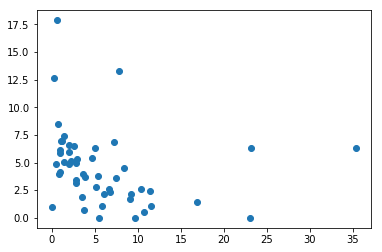

In [18]:
plt.scatter(low, high)

In [12]:
prices

price,close_price,high,low,open_price,volume
20181029,45.49,46.75,44.44,45.77,324594.0
20181030,47.99,48.00,45.07,45.49,388869.0
20181031,47.00,48.56,46.82,47.74,298621.0
20181101,48.05,48.47,46.83,47.01,254296.0
20181102,47.19,48.73,46.75,48.66,286576.0
20181105,48.05,48.25,46.92,47.16,219173.0
20181106,47.35,47.92,47.03,47.80,226457.0
20181107,48.82,48.84,47.48,47.62,285024.0
20181108,49.00,49.29,48.33,48.66,245440.0
20181109,47.93,49.03,47.87,48.75,202056.0


### Pegged orders

In [11]:
quotes = ib_api.get_quotes(["AMZN", "MSFT", "INTC", "NVDA"])

In [13]:
quotes["AMZN"]

1867.0

In [ ]:
orders = [
    {
        'symbol': 'AMZN',
        'instruction': 'BUY',
        'quantity': 1,
        'starting_price': quotes["AMZN"],
        'outside_rth': True,
        'tif': 'DAY',
        
    }
]


In [ ]:
ib_api.create_pegged_orders()